## **BASIC IMAGE CLASSIFICATION:CIFAR_10**


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


build own model: https://medium.com/edureka/tensorflow-image-classification-19b63b7bfd95

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_train)


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 127ms/step - accuracy: 0.2604 - loss: 1.9808 - val_accuracy: 0.4977 - val_loss: 1.4099
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.4347 - loss: 1.5569 - val_accuracy: 0.5684 - val_loss: 1.2337
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 122ms/step - accuracy: 0.4853 - loss: 1.4257 - val_accuracy: 0.5882 - val_loss: 1.1609
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.5204 - loss: 1.3439 - val_accuracy: 0.6152 - val_loss: 1.0844
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.5323 - loss: 1.3174 - val_accuracy: 0.6301 - val_loss: 1.0568
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.5377 - loss: 1.2953 - val_accuracy: 0.6283 - val_loss: 1.0661
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 115ms/step - accuracy: 0.5655 - loss: 1.2440 - val_accuracy: 0.6412 - val_loss: 1.0264
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 117ms/step - accuracy: 0.5644 - loss: 1.2385 -

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6652 - loss: 0.9638
Test Accuracy: 0.66


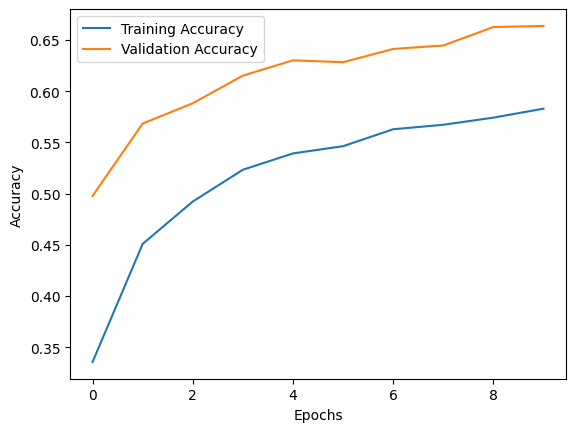

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


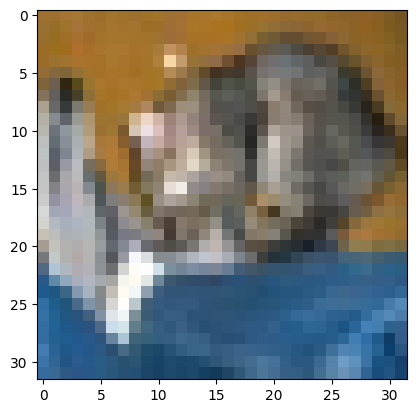

Predicted Class: 3
Predicted Class: {predictions}


In [ ]:
import numpy as np

# Load an image and preprocess
new_image = x_test[0]  # Example: using a test image
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(new_image)
plt.imshow(new_image[0])
plt.show()
print(f"Predicted Class: {np.argmax(predictions)}")

### **TRY YOUR SELF**

https://medium.com/@esrasoylu/creating-a-cnn-model-for-image-classification-with-tensorflow-49b84be8c12a  

https://www.tensorflow.org/tutorials/keras/classification
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

model.fit(train_images, train_labels, epochs=10)

## **CREATE YOUR OWN DATASET, APPLY IMAGE CLASSIFICATION**

In [ ]:
#From self dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
import os
import zipfile

zip_path = '/content/archive-20250107T125327Z-001.zip'
print(f"zip_path: {zip_path}")

if os.path.exists(zip_path):
    print("File exists at the specified path.")
else:
    print("File not found. Please check the path.")
       # If the file doesn't exist, you need to upload or download the correct file to the specified location.

   # Rest of the code for extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
       zip_ref.extractall('/content/archive-20250107T125327Z-001')
       dataset_path = '/content/archive'

zip_path: /content/archive-20250107T125327Z-001.zip
File exists at the specified path.


In [ ]:
train_dir = '/content/archive-20250107T125327Z-001/archive/test'
validation_dir = '/content/archive-20250107T125327Z-001/archive/test'


In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Rescale validation data
validation_datagen = ImageDataGenerator(rescale=1.0/255)


# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for binary classification
)


validation_generator = validation_datagen.flow_from_directory(
   validation_dir,
   target_size=(150, 150),
   batch_size=32,
   class_mode='categorical'
)


Found 2138 images belonging to 3 classes.
Found 2138 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#history = model.fit(train_generator,epochs=10,validation_data=validation_generator)
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 501ms/step - accuracy: 0.3842 - loss: 1.2130 - val_accuracy: 0.6394 - val_loss: 0.8353
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 293ms/step - accuracy: 0.5922 - loss: 0.8642 - val_accuracy: 0.8976 - val_loss: 0.3936
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 373ms/step - accuracy: 0.7497 - loss: 0.6297 - val_accuracy: 0.9228 - val_loss: 0.2666
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 305ms/step - accuracy: 0.8346 - loss: 0.4434 - val_accuracy: 0.9411 - val_loss: 0.2210
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - accuracy: 0.8261 - loss: 0.4515 - val_accuracy: 0.9467 - val_loss: 0.1687
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - accuracy: 0.8547 - loss: 0.4092 - val_accuracy: 0.9630 - val_loss: 0.1326
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - accuracy: 0.8728 - loss: 0.3701 - val_accuracy: 0.9551 - val_loss: 0.1370
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.8885 - loss: 0.3055 - val_accuracy: 0.942

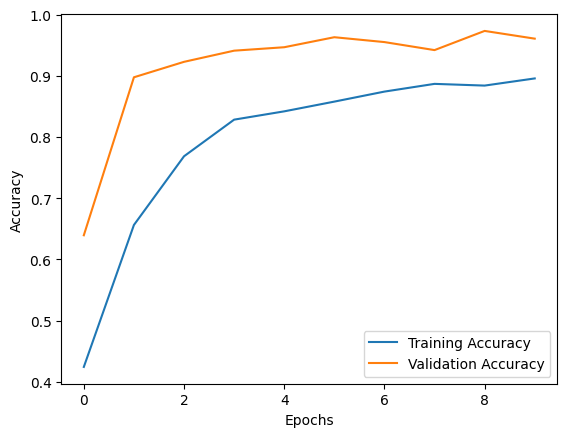

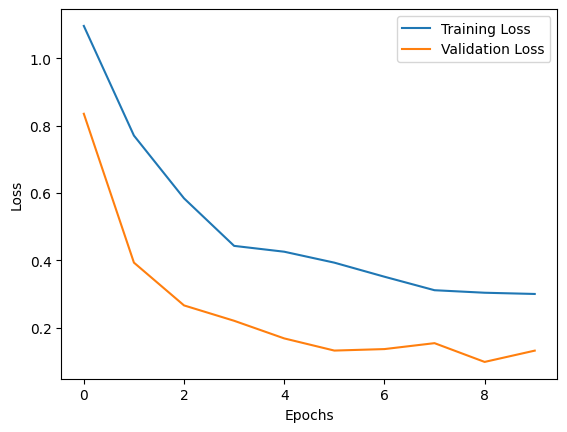

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class Index: 1
Predicted Class Label: rock


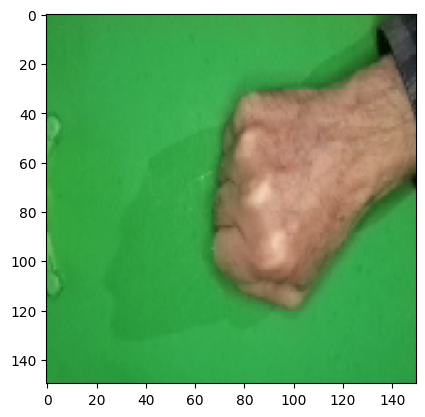

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = '/content/0NDYNEoDui7o64gU.png'  # Replace with the uploaded file name
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
predictions = model.predict(img_array)
class_labels = list(train_generator.class_indices.keys())
predicted_class_index = np.argmax(predictions[0]) # predictions is a list of lists, we need the inner list

predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Label: {predicted_class_label}")
plt.imshow(img)

### **YOLO**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 15.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Upload your image file:


Saving The-cameraman.png to The-cameraman.png
PRO TIP 💡 Replace 'model=/content/yolov5s.pt' with new 'model=/content/yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 134MB/s] 



image 1/1 /content/The-cameraman.png: 640x640 1 person, 1044.2ms
Speed: 23.7ms preprocess, 1044.2ms inference, 30.2ms postprocess per image at shape (1, 3, 640, 640)


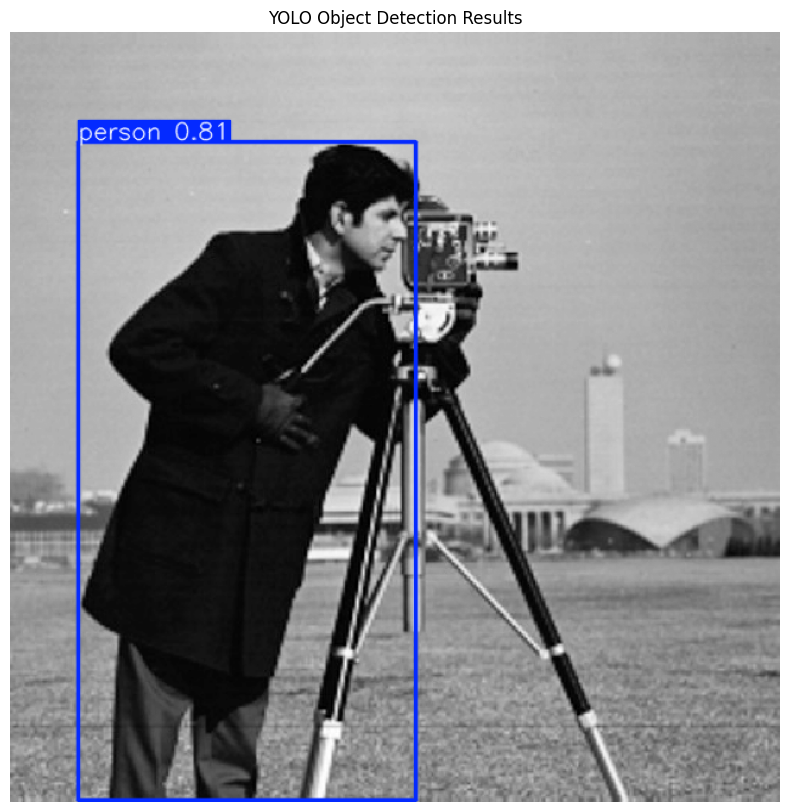

In [ ]:
# Step 1: Install ultralytics for YOLOv5
!pip install ultralytics -q

# Step 2: Import required libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# Step 3: Upload an image
print("Upload your image file:")
uploaded = files.upload()

# Step 4: Save the uploaded image
image_path = list(uploaded.keys())[0]

# Step 5: Load the pre-trained YOLOv5 model
model = YOLO('/content/yolov5s.pt')  # Use the YOLOv5 small model

# Step 6: Perform object detection
results = model.predict(source=image_path, conf=0.5)  # Confidence threshold set to 0.5

# Step 7: Display the results
# YOLO's predict method returns images with bounding boxes already plotted
output_image = results[0].plot()

# Convert image from BGR to RGB for displaying with matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.axis("off")
plt.title("YOLO Object Detection Results")
plt.show()


## **SSD**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

PROTOTXT = "/content/MobileNetSSD_deploy.prototxt"
MODEL = "/content/MobileNetSSD_deploy.caffemodel"
INP_VIDEO_PATH = '/content/car-detection.mp4'
OUT_VIDEO_PATH = '/content/car.mp4'
GPU_SUPPORT = 0
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus",  "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL)
if GPU_SUPPORT:
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

cap = cv2.VideoCapture(INP_VIDEO_PATH)
while True:
    ret, frame = cap.read()
    if not ret:
       break
    h, w = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()
    for i in np.arange(0, detections.shape[2]):
       confidence = detections[0, 0, i, 2]
       if confidence > 0.5:
           idx = int(detections[0, 0, i, 1])
           box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
           (startX, startY, endX, endY) = box.astype("int")
           label = "{}: {:.2f}%".format(CLASSES[idx],confidence*100)
           cv2.rectangle(frame, (startX, startY), (endX, endY),    COLORS[idx], 2)
           y = startY - 15 if startY - 15 > 15 else startY + 15
           cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
           cv2_imshow(frame)


cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.